In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

0     2
1    28
2     8
dtype: int64


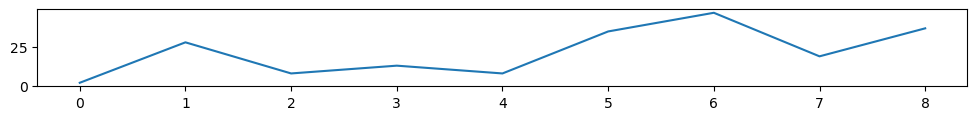

In [2]:
########################################################
# example plot df Series
########################################################


import pandas as pd
s = pd.Series([np.random.randint(1,50) for i in range(1,10)])
print(s[:3])
plt.figure(figsize=(12,1))
p = plt.plot(s.index, s.values)

In [3]:
########################################################
# example plot df LinearRegression 
########################################################


import numpy as np
from sklearn.model_selection import train_test_split
x = np.arange(1, 25).reshape(12, 2)
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])
print(x[:3])
print(y[:3])

[[1 2]
 [3 4]
 [5 6]]
[0 1 1]


In [4]:
#x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
#x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=4, random_state=4 )

In [6]:
#x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=4, stratify=y )

In [7]:
#x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, shuffle=False )

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
x = np.arange(110).reshape(-1, 1)
#y = np.array([5, 12, 11, 19, 30, 29, 23, 40, 51, 54])
#y = np.random.rand(10,1)
y = np.random.randint(5, size=110)

print(x[:5])
print(y[:5])

[[0]
 [1]
 [2]
 [3]
 [4]]
[3 1 0 0 1]


In [9]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=4, random_state=0 )

In [10]:
model = LinearRegression().fit(x_train, y_train)
model.intercept_
model.coef_

array([0.00104655])

In [11]:
model.score(x_train, y_train)
model.score(x_test, y_test)

-0.05317407134472241

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, shuffle=True)
print(x_train[:3])
print(x_test[:3])
print(y_train[:3])
print(y_test[:3])

[[33]
 [55]
 [69]]
[[78]
 [10]
 [ 4]]
[2 2 3]
[4 4 1]


In [13]:
x_test.shape

(33, 1)

In [14]:
y_test.shape

(33,)

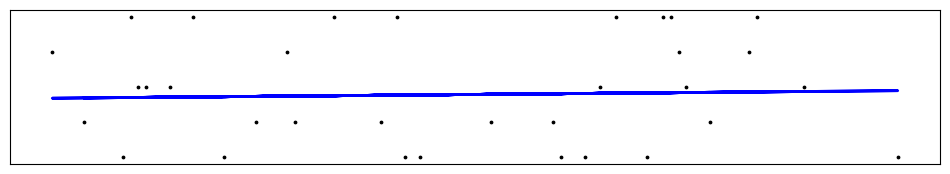

In [15]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

plt.figure(figsize=(12,2))
plt.scatter(x_test, y_test, color="black",s=3)
plt.plot(x_test, y_pred, color="blue", linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()
plt.close()

In [16]:
########################################################
# example plot mixed series 
########################################################

import numpy as np
import pandas as pd
np.random.seed(1)
rows,cols = 5,3
data = np.random.rand(rows,cols) # You can use other random functions to generate values with constraints
tidx = pd.date_range('2019-01-01', periods=rows, freq='MS') # freq='MS'set the frequency of date in months and start from day 1. You can use 'T' for minutes and so on
data_frame = pd.DataFrame(data, columns=['a','b','c'], index=tidx)
data_frame['d'] = data_frame['a'] + data_frame['b'] + data_frame['c'] # sum of other colums
print (data_frame)

                   a         b         c         d
2019-01-01  0.417022  0.720324  0.000114  1.137461
2019-02-01  0.302333  0.146756  0.092339  0.541427
2019-03-01  0.186260  0.345561  0.396767  0.928588
2019-04-01  0.538817  0.419195  0.685220  1.643231
2019-05-01  0.204452  0.878117  0.027388  1.109957


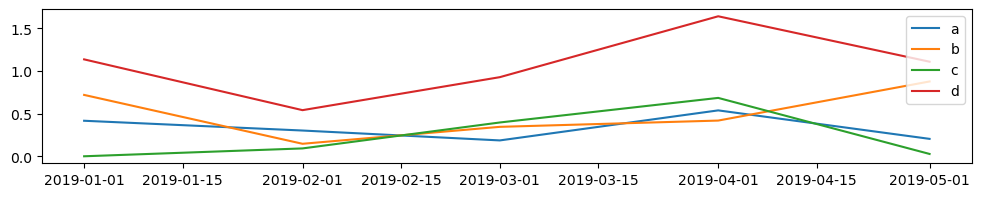

In [17]:
plt.figure(figsize=(12,2))
plt.plot(data_frame.index,data_frame['a'].values , label='a')
plt.plot(data_frame.index,data_frame['b'].values , label='b')
plt.plot(data_frame.index,data_frame['c'].values , label='c')
plt.plot(data_frame.index,data_frame['d'].values , label='d')
plt.legend(loc=1)
#plt.ylabel('a', fontsize=14)
#plt.xlabel('b', fontsize=14)
#plt.title('c', fontsize=16)
plt.show()
plt.close()

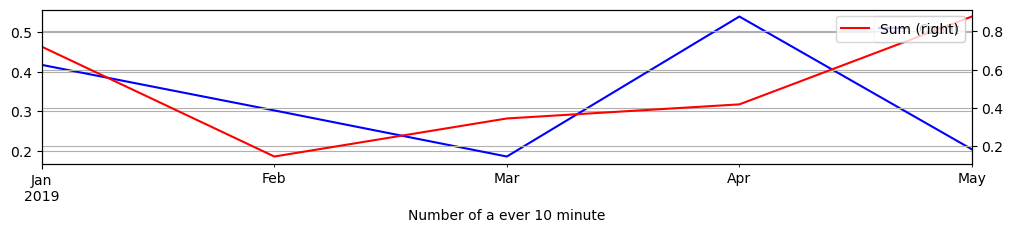

In [18]:
########################################################
# example plot mixed series 
########################################################


plt.figure(figsize=(12,2))
# Number of a every 10 minutes
log_10minutely_count_Series = data_frame['a'] # .resample('10min').count()
log_10minutely_count_Series.name="Count"
log_10minutely_count_Series.plot(color='blue', grid=True)
plt.legend(loc='upper left')
plt.xlabel('Number of a ever 10 minute')
# Sum of b size over each 10 minute
log_10minutely_sum_Series = data_frame['b'] # .resample('10min').sum()
log_10minutely_sum_Series.name = 'Sum'
log_10minutely_sum_Series.plot(color='red',grid=True, secondary_y=True)
plt.legend(loc='upper right')
plt.show()

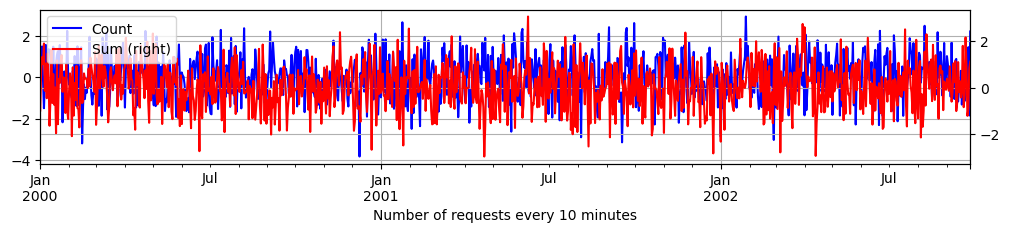

In [19]:
########################################################
# example plot mixed series 
########################################################

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
plt.figure(figsize=(12,2))
plt.xlabel('Number of requests every 10 minutes')
ax1 = df.A.plot(color='blue', grid=True, label='Count')
ax2 = df.B.plot(color='red', grid=True, secondary_y=True, label='Sum')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()
plt.close()

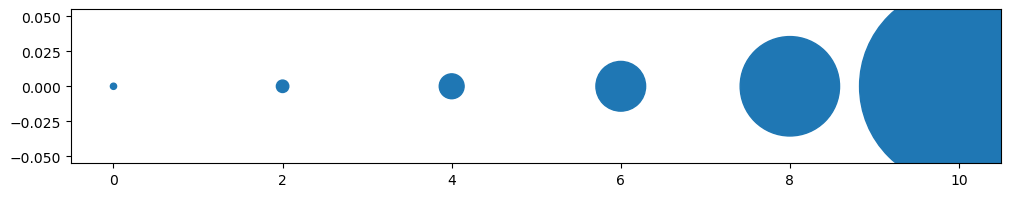

In [20]:
########################################################
# example plot markers 
########################################################


# doubling the width of markers
plt.figure(figsize=(12,2))
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*4**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()
plt.close()

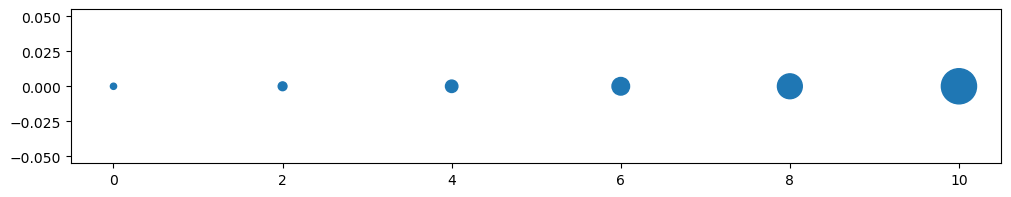

In [21]:
# doubling the area of markers
plt.figure(figsize=(12,2))
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()
plt.close()

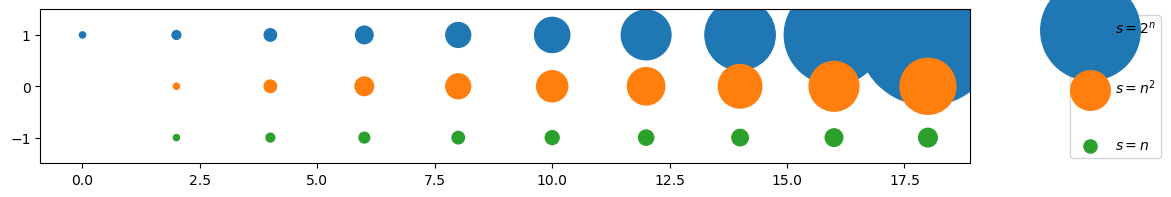

In [22]:
plt.figure(figsize=(12,2))
x = [0,2,4,6,8,10,12,14,16,18]
s_exp = [20*2**n for n in range(len(x))]
s_square = [20*n**2 for n in range(len(x))]
s_linear = [20*n for n in range(len(x))]
plt.scatter(x,[1]*len(x),s=s_exp, label='$s=2^n$', lw=1)
plt.scatter(x,[0]*len(x),s=s_square, label='$s=n^2$')
plt.scatter(x,[-1]*len(x),s=s_linear, label='$s=n$')
plt.ylim(-1.5,1.5)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()
plt.close()

In [23]:

########################################################
# example plot DF LinearRegression 
########################################################

import numpy as np
import pandas as pd
np.random.seed(1)
rows,cols = 50,1
data = np.random.rand(rows,cols) # You can use other random functions to generate values with constraints
tidx = pd.date_range('2019-01-01', periods=rows, freq='MS') # freq='MS'set the frequency of date in months and start from day 1. You can use 'T' for minutes and so on
data_frame = pd.DataFrame(data, columns=['a'], index=tidx)
print (data_frame[:3])
# add time column
data_frame = data_frame.copy()
data_frame['Time'] = np.arange(len(data_frame.index))
# add lag col
data_frame['Lag_1'] = data_frame['a'].shift(1)
# add indx
#data_frame = data_frame.set_index("Day")
data_frame.index.name='Day'
# show DF
data_frame.head()


                   a
2019-01-01  0.417022
2019-02-01  0.720324
2019-03-01  0.000114


,a,Time,Lag_1
Day,,,
2019-01-01,0.417022,0,NaN
2019-02-01,0.720324,1,0.417022
2019-03-01,0.000114,2,0.720324
2019-04-01,0.302333,3,0.000114
2019-05-01,0.146756,4,0.302333


In [24]:
data_frame.tail()

,a,Time,Lag_1
Day,,,
2022-10-01,0.447894,45,0.103226
2022-11-01,0.908596,46,0.447894
2022-12-01,0.293614,47,0.908596
2023-01-01,0.287775,48,0.293614
2023-02-01,0.130029,49,0.287775


In [25]:
from sklearn.linear_model import LinearRegression
# Training data
x = data_frame.loc[:, ['Time']]  # features
y = data_frame.loc[:, 'a']  # target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) # random_state=42, shuffle=True
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

# Train the model
#model = LinearRegression()
#model.fit(x, y)
#y_pred = pd.Series(model.predict(x), index=x.index)

y_pred[:3]

array([0.46528282, 0.52293165, 0.47489096])

In [26]:
x_test.shape

(15, 1)

In [27]:
x_test.head()

,Time
Day,
2019-06-01,5
2021-06-01,29
2019-10-01,9
2020-11-01,22
2021-10-01,33


In [28]:
y_test.shape

(15,)

In [29]:
y_test.head()

Day
2019-06-01    0.092339
2021-06-01    0.878143
2019-10-01    0.538817
2020-11-01    0.313424
2021-10-01    0.533165
Name: a, dtype: float64

In [30]:
y_pred.shape

(15,)

In [31]:
#y_pred.head()

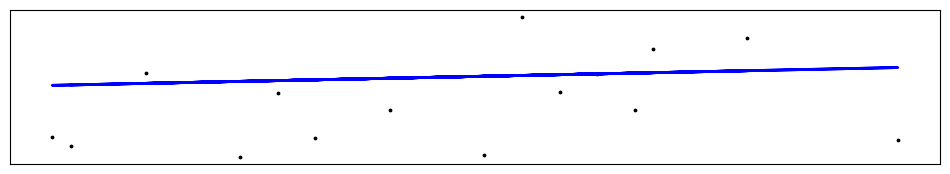

In [32]:
plt.figure(figsize=(12,2))
plt.scatter(x_test, y_test, color="black",s=3)
plt.plot(x_test, y_pred, color="blue", linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()
plt.close()

In [33]:
from sklearn.linear_model import LinearRegression
# Training data
X = data_frame.loc[:, ['Time']]  # features
y = data_frame.loc[:, 'a']  # target
# Train the model
model = LinearRegression()
model.fit(X, y)
# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred.head()

Day
2019-01-01    0.378655
2019-02-01    0.382260
2019-03-01    0.385865
2019-04-01    0.389470
2019-05-01    0.393075
Freq: MS, dtype: float64

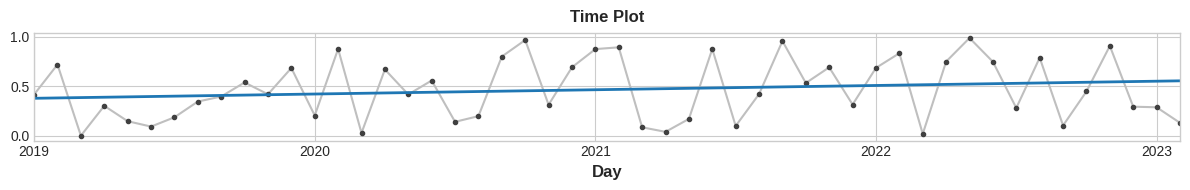

In [34]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(12, 2))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=12,
    titlepad=8,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=2)
ax.set_title('Time Plot');

In [35]:
from sklearn.linear_model import LinearRegression
X = data_frame.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = data_frame.loc[:, 'a']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred.head()

Day
2019-02-01    0.470708
2019-03-01    0.456228
2019-04-01    0.490613
2019-05-01    0.476184
2019-06-01    0.483612
Freq: MS, dtype: float64

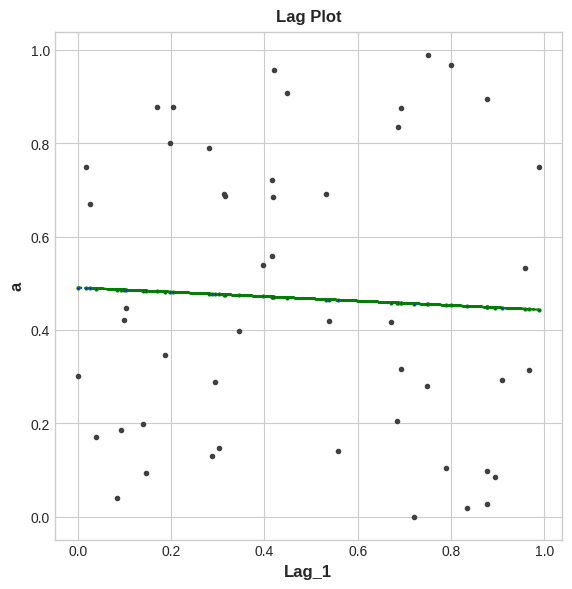

In [36]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(6)
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred,'-' ,markerfacecolor='blue', markersize=2, marker='o', color='green', linestyle='dashed')
ax.set_aspect('equal')
ax.set_ylabel('a')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot');

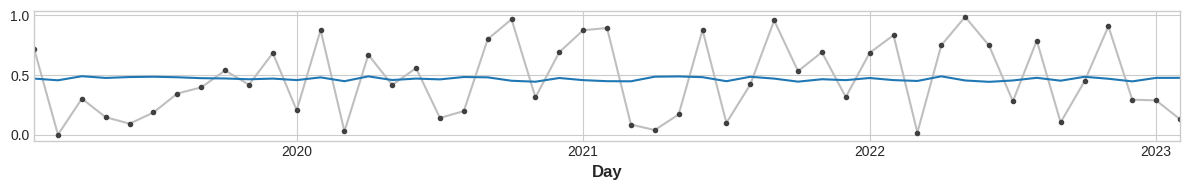

In [37]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

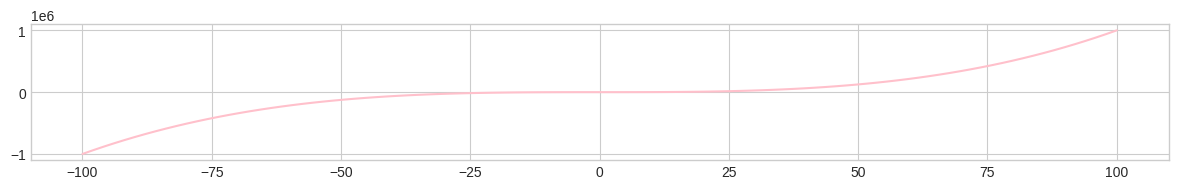

In [38]:
########################################################
# example plot func  
########################################################

def plot(func):
    plt.figure(figsize=(12, 2))
    x = np.linspace(-100, 100, 100)
    y = func(x)
    plt.plot(x, y, '-', color='pink')
    plt.show()
    plt.close()

plot(lambda x: x ** 3 - (1 / x))

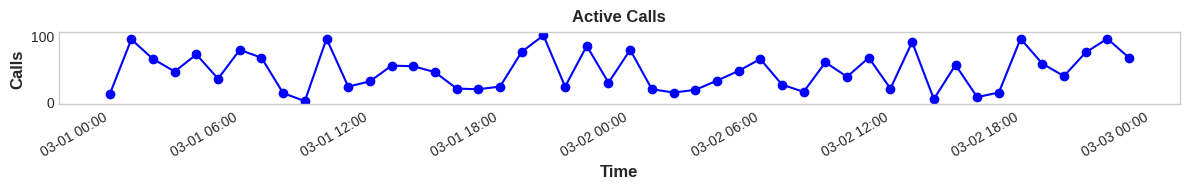

In [39]:
########################################################
# example plot Active Calls
########################################################

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
 
x = mdates.drange(dt.datetime(2021, 3, 1, 0, 0, 0), dt.datetime(2021, 3, 3, 0, 0, 0),
                     dt.timedelta(hours=1))
y = [random.randint(0,100) for _ in range(len(x))]
time = mdates.drange(dt.datetime(2021, 3, 1, 0, 0, 0), dt.datetime(2021, 3, 3, 1, 0, 0),
                     dt.timedelta(hours=6))
  
fig, ax = plt.subplots(figsize=(12,2))
plt.xticks(time)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m-%d %H:%M"))
ax.plot(x, y, 'bo-')
ax.set(title='Active Calls', ylabel='Calls', xlabel='Time')
ax.grid()
  
ax.xaxis_date() # Default date formatter
fig.autofmt_xdate()
  
plt.show()

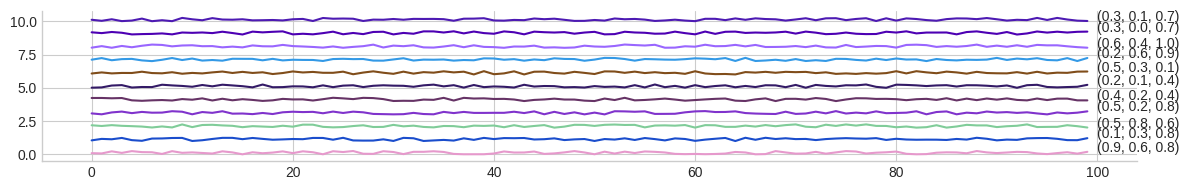

In [40]:
########################################################
# 9 ways to set colors in Matplotlib
########################################################



x = np.array(range(100)) 

fig = plt.figure()
ax = plt.subplot(111)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

for i in range(11):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    
    y = i + np.random.rand(100)*0.25
    plt.plot(x, y, color=[r,g,b])
    plt.annotate(f"({r}, {g}, {b})", (100, y[-1]))

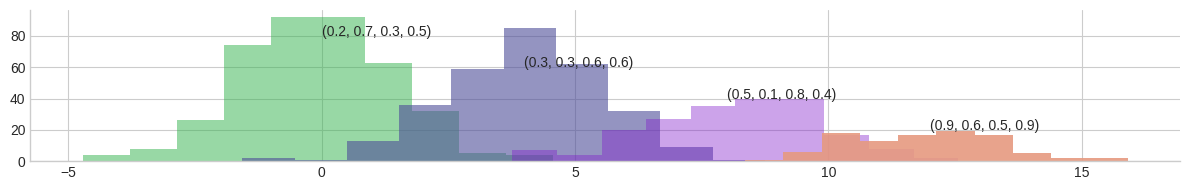

In [41]:
np.random.seed(12)
x = np.array(range(100)) 

fig = plt.figure()
ax = plt.subplot(111)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

for i in range(4):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    a = np.round(np.clip(np.random.rand(), 0, 1), 1)
    
    y = i+np.random.normal(i*3, 1.5, (4-i)*100)
    plt.hist(y, color=[r,g,b, a], label=str(np.round(i*0.1, 1)))
    plt.annotate(f"({r}, {g}, {b}, {a})", (i*4, (4-i)*20))

In [42]:
plt.plot([3,1,2,4], color="#11aa00")
plt.plot([4,2,1,3], color="#11aa0055")
plt.annotate(f"#11aa00", (0.1, 2.8))
plt.annotate(f"#11aa0055", (0.1, 3.8))
plt.close()

In [43]:
plt.plot([3,1,2,4], color="#1a0")
plt.plot([4,2,1,3], color="#1a05")
plt.annotate(f"#1a0", (0.1, 2.8))
plt.annotate(f"#1a05", (0.1, 3.8))
plt.close()

In [44]:
###########################################
# New York stock exchange prices 
###########################################
#prices = pd.read_csv('prices.csv', index_col='date', parse_dates=True)

import numpy as np
import pandas as pd
#np.random.seed(1)
rows,cols = 10,3
data = np.random.rand(rows,cols) # You can use other random functions to generate values with constraints
tidx = pd.date_range('2019-01-01', periods=rows, freq='MS') # freq='MS'set the frequency of date in months and start from day 1. You can use 'T' for minutes and so on
#s_arr_rand_str = pd.util.testing.rands_array(10, N)
prices = pd.DataFrame(data, columns=['symbol','close','volume'], index=tidx)
prices['close'] = prices['close'] * 100
prices['volume'] = prices['volume'] * 10000
print (prices[:3])
prices.index.name='date'
# generate random string into column
prices.drop(columns=['symbol'])
prices['symbol'] = pd.Series(
    random.choices(['AAPL', 'ABT'], weights=[1, 1], k=len(prices)), 
    index=prices.index
)
# show DF
prices.head()

              symbol      close       volume
2019-01-01  0.935304  30.138087  3657.047264
2019-02-01  0.186697  78.213475  8533.978179
2019-03-01  0.373179  44.357324  2981.092965


,symbol,close,volume
date,,,
2019-01-01,AAPL,30.138087,3657.047264
2019-02-01,AAPL,78.213475,8533.978179
2019-03-01,ABT,44.357324,2981.092965
2019-04-01,ABT,27.389389,429.914852
2019-05-01,AAPL,28.255379,1751.789868


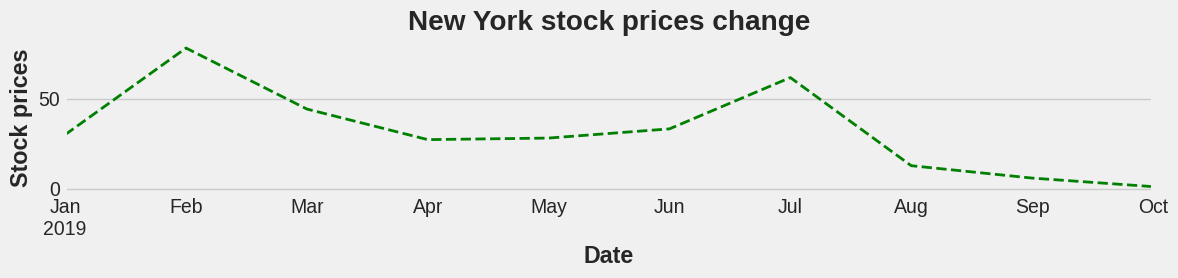

In [45]:
#plt.figure(figsize=(12,1))
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
#fig.set_figheight(2)
#fig.set_figwidth(2)
prices['close'].plot(ax=ax1, markerfacecolor='blue', markersize=4,  color='green', linestyle='dashed',  linewidth=2, figsize=(12,3))
plt.title('New York stock prices change')
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.show()
plt.close()


In [46]:
###########################################
# rand data
###########################################

import pandas as pd
import numpy as np

#create DataFrame
df = pd.DataFrame(np.random.randint(0,100,size=(10, 3)), columns=list('ABC')) 

#view DataFrame
print(df[:3])

    A   B   C
0  66  60  52
1  29  84  46
2  49   1  96


In [47]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   'points': [18, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

#view DataFrame
print(df[:3])


  team  points  assists  rebounds
0    A      18        5        11
1    B      22        7         8
2    C      19        7        10


In [48]:
import numpy as np
#add 'rand' column that contains 8 random integers between 0 and 100
df['rand'] = np.random.randint(0,100,size=(8, 1))
#view updated DataFrame
print(df[:3])

  team  points  assists  rebounds  rand
0    A      18        5        11    71
1    B      22        7         8    95
2    C      19        7        10    96


In [49]:
# Setup
df = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [{}, [1, 2, 3], 123]})
print(df[:3])

   A          B
0  a         {}
1  b  [1, 2, 3]
2  c        123


In [50]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
print(s)

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string
